In [44]:
import pandas as pd
import numpy as np
from pathlib import Path
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.style.use(['fast'])
plt.style.use(['seaborn-poster'])
print(plt.style.available)

DATA_FOLDER = "/data/cubes/"
DATA_PATH = os.path.abspath(os.getcwd()) + DATA_FOLDER

['dark_background', 'seaborn-colorblind', 'seaborn-talk', 'seaborn-paper', 'seaborn-deep', 'seaborn-poster', 'fast', 'bmh', 'seaborn-whitegrid', 'ggplot', 'seaborn-ticks', 'seaborn-darkgrid', 'seaborn-pastel', '_classic_test', 'seaborn-notebook', 'classic', 'seaborn-white', 'fivethirtyeight', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-muted', 'seaborn', 'grayscale', 'seaborn-bright', 'Solarize_Light2']


In [3]:
# Iterate over files and find csv files that have allocation of cubes for each participant
dfs = []

for path in Path(DATA_PATH).rglob('participant_*.csv'):
    participant_id = int(re.search(r'\d+', path.name).group())
    temp = pd.read_csv(path)
    temp["scene"] = temp["scene"].str[-1:]
    temp["scene"] = temp["scene"].astype('int')
    temp["participant"] = participant_id
    nvc = "B"
    if int(participant_id) % 2 == 0:
        nvc = "A"

    temp["NVC"] = nvc
    dfs.append(temp)


raw_data = pd.concat(dfs, axis=0, ignore_index=True)

In [4]:
raw_data.head()

,scene,robot_a,robot_b,participant,NVC
0,0,0,1,1,B
1,1,1,1,1,B
2,2,3,2,1,B
3,3,3,3,1,B
4,4,3,3,1,B


In [5]:
odd_participants_data = raw_data[raw_data["participant"] % 2 != 0]
odd_participants_data = odd_participants_data[odd_participants_data["scene"] >= 1]
even_participants_data = raw_data[raw_data["participant"] % 2 == 0]
even_participants_data = even_participants_data[even_participants_data["scene"] >= 1]

In [6]:
odd_participants_data.head()

,scene,robot_a,robot_b,participant,NVC
1,1,1,1,1,B
2,2,3,2,1,B
3,3,3,3,1,B
4,4,3,3,1,B
11,1,1,2,3,B


In [7]:
odd_cubes_per_participant = odd_participants_data.groupby("participant").sum()
even_cubes_per_participant = even_participants_data.groupby("participant").sum()

odd_cubes_per_participant = odd_cubes_per_participant.drop(columns=['scene'])
even_cubes_per_participant = even_cubes_per_participant.drop(columns=['scene'])

odd_cubes_per_participant['total_cubes'] = (odd_cubes_per_participant['robot_a'] + 
                                                odd_cubes_per_participant['robot_b'])
even_cubes_per_participant['total_cubes'] = (even_cubes_per_participant['robot_a'] + 
                                                even_cubes_per_participant['robot_b'])

odd_cubes_per_participant.head()

,robot_a,robot_b,total_cubes
participant,,,
1,10,9,19
3,12,11,23
5,10,13,23
7,7,17,24
9,12,12,24


In [8]:
odd_cubes_per_participant.sum()

robot_a        155
robot_b        159
total_cubes    314
dtype: int64

# Participants which had robotB as NVC

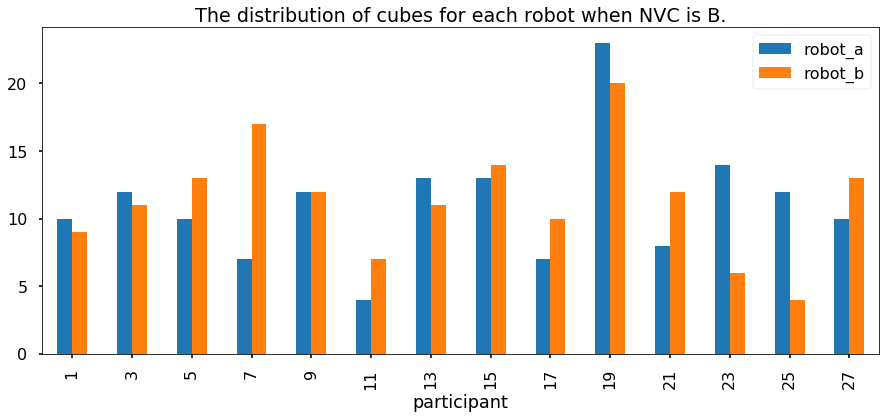

In [9]:
odd_cubes_per_participant_plot_data = odd_cubes_per_participant.drop(columns=['total_cubes'])
odd_cubes_per_participant_plot_data.plot(kind = 'bar', figsize=(15,6), 
                                         title="The distribution of cubes for each robot when NVC is B.", 
                                         yticks=range(0,25,5))

# Participants which had robotA as NVC

In [10]:
even_cubes_per_participant.head()

,robot_a,robot_b,total_cubes
participant,,,
2,8,8,16
4,7,7,14
6,1,17,18
8,10,12,22
10,8,15,23


In [11]:
even_cubes_per_participant.sum()

robot_a         90
robot_b        113
total_cubes    203
dtype: int64

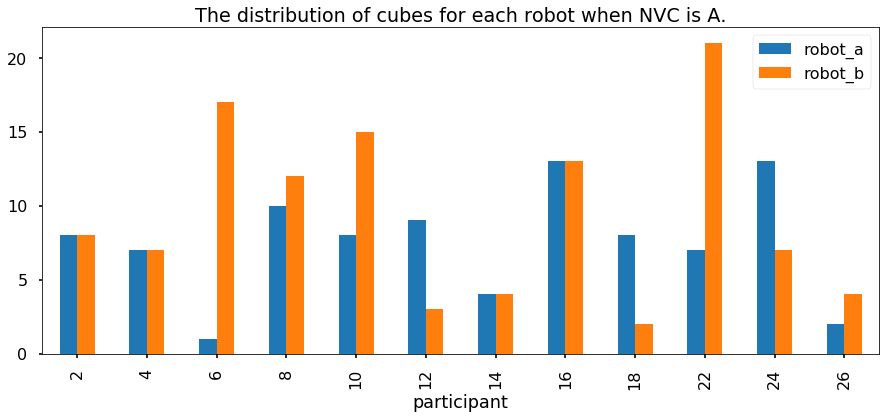

In [12]:
even_cubes_per_participant_plot_data = even_cubes_per_participant.drop(columns=['total_cubes'])
even_cubes_per_participant_plot_data.plot(kind = 'bar', figsize=(15,6), title="The distribution of cubes for each robot when NVC is A.", yticks=range(0,25,5))

# NVC-B group by scene

In [13]:
odd_participants_by_scene = odd_participants_data.groupby("scene").sum().drop(columns=['participant'])
odd_participants_by_scene

,robot_a,robot_b
scene,,
1,24,32
2,34,41
3,52,40
4,45,46


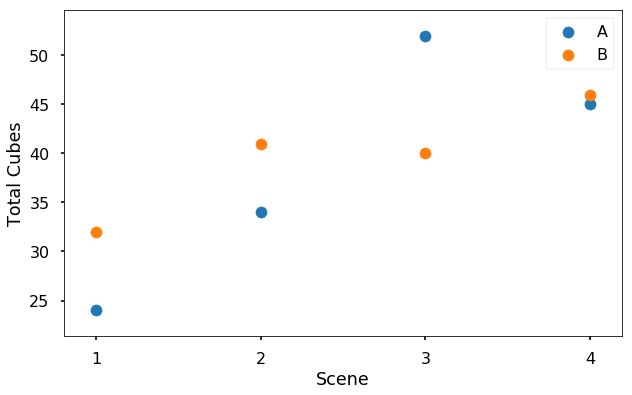

In [81]:
plt.figure(figsize=(10,6))
plt.xticks(range(1,5))
plt.yticks(range(0,70,5))
plt.scatter(odd_participants_by_scene.index, odd_participants_by_scene["robot_a"], label="A")
plt.scatter(odd_participants_by_scene.index, odd_participants_by_scene["robot_b"], label="B")
plt.xlabel('Scene')
plt.ylabel('Total Cubes')
plt.legend()
plt.show()

# NVC-A group by scene

In [83]:
even_participants_by_scene = even_participants_data.groupby("scene").sum().drop(columns=['participant'])
even_participants_by_scene

,robot_a,robot_b
scene,,
1,19,9
2,15,37
3,28,28
4,28,39


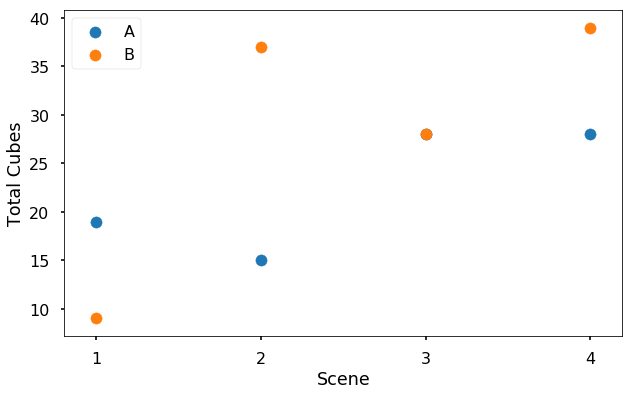

In [82]:
plt.figure(figsize=(10,6))
plt.xticks(range(1,5))
plt.yticks(range(0,70,5))
plt.scatter(even_participants_by_scene.index, even_participants_by_scene["robot_a"], label="A")
plt.scatter(even_participants_by_scene.index, even_participants_by_scene["robot_b"], label="B")
plt.xlabel('Scene')
plt.ylabel('Total Cubes')
plt.legend()
plt.show()

Text(0,0.5,'total cubes')

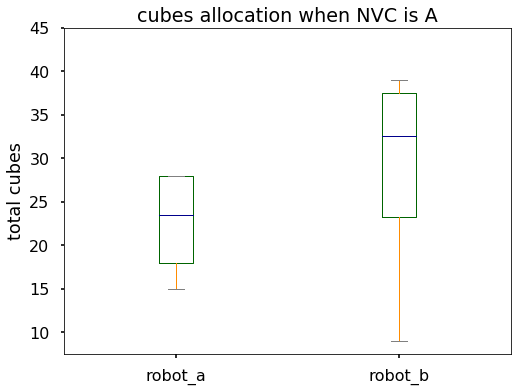

In [17]:
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange','medians': 'DarkBlue', 'caps': 'Gray'}
ax = even_participants_by_scene.plot(kind = 'box', color = color, sym='', figsize=(8,6), yticks=range(10,50,5),
                                    title = "cubes allocation when NVC is A")
ax.set_ylabel("total cubes")

Text(0,0.5,'total cubes ')

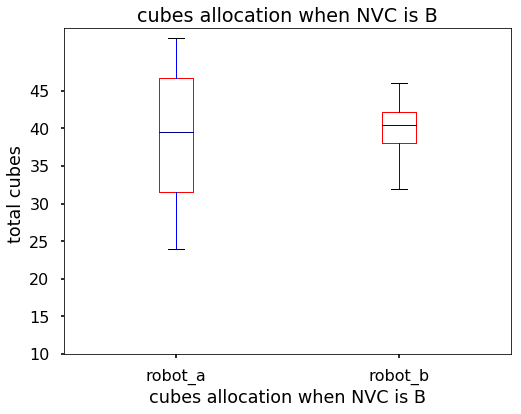

In [18]:
color = {'boxes': 'Red', 'whiskers': 'Blue','medians': 'DarkBlue', 'caps': 'Black'}
ax = odd_participants_by_scene.plot(kind = 'box', color = color, sym='', figsize=(8,6),yticks=range(10,50,5),
                                    title = "cubes allocation when NVC is B")
ax.set_xlabel("cubes allocation when NVC is B")
ax.set_ylabel("total cubes ")

In [19]:
odd_participants_data.groupby(["participant", "scene"]).sum().head()

robot_a  robot_b
participant scene                  
1           1            1        1
            2            3        2
            3            3        3
            4            3        3
3           1            1        2

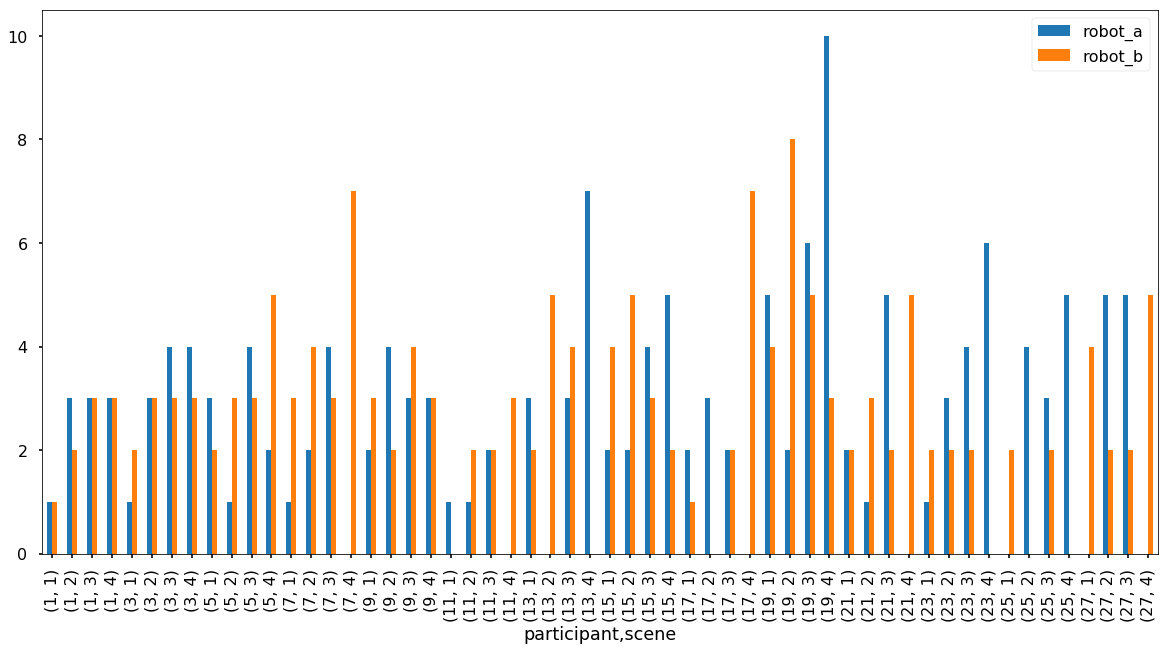

In [20]:
odd_participants_data.groupby(["participant", "scene"]).sum().plot(kind='bar', figsize=(20,10), by='participant')

In [21]:
even_participants_data.groupby(["participant", "scene"]).sum().head()

robot_a  robot_b
participant scene                  
2           1            2        1
            2            2        2
            3            0        3
            4            4        2
4           1            0        0

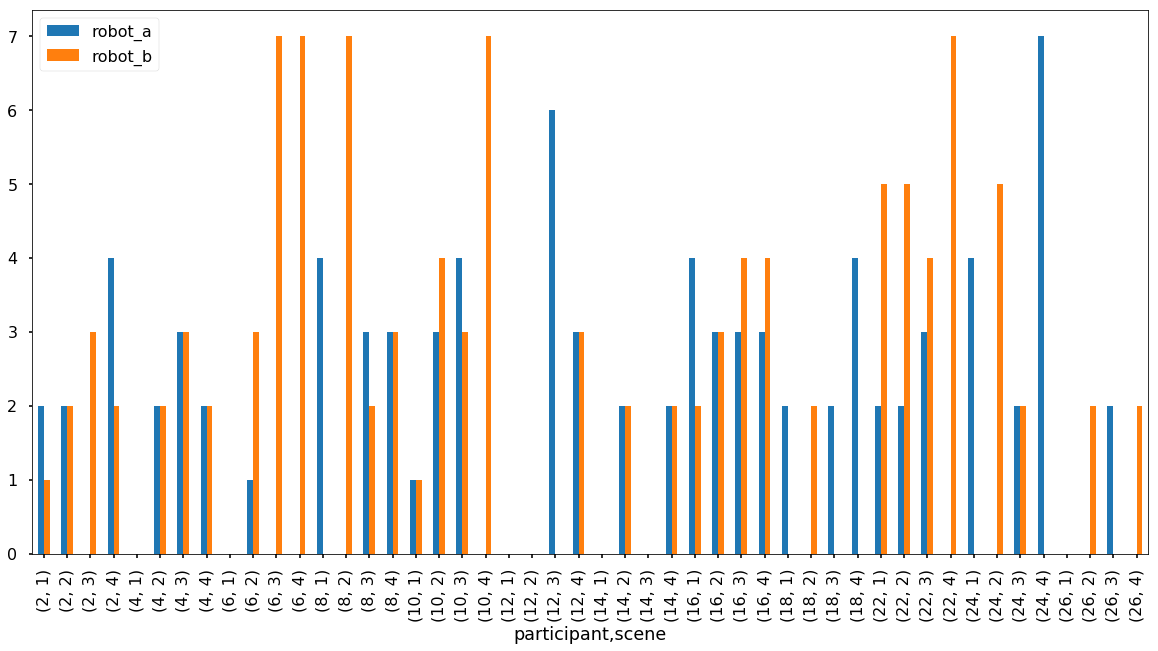

In [22]:
even_participants_data.groupby(["participant", "scene"]).sum().plot(kind='bar', figsize=(20,10))

# Separating data scene wise for participants where NVC is B

In [28]:
#odds_scene_0 = odd_participants_data[(odd_participants_data["scene"] == 0)]
odds_scene_1 = odd_participants_data[(odd_participants_data["scene"] == 1)]
odds_scene_2 = odd_participants_data[(odd_participants_data["scene"] == 2)]
odds_scene_3 = odd_participants_data[(odd_participants_data["scene"] == 3)]
odds_scene_4 = odd_participants_data[(odd_participants_data["scene"] == 4)]

# Cubes when NVC is B (scene 1 and 2)

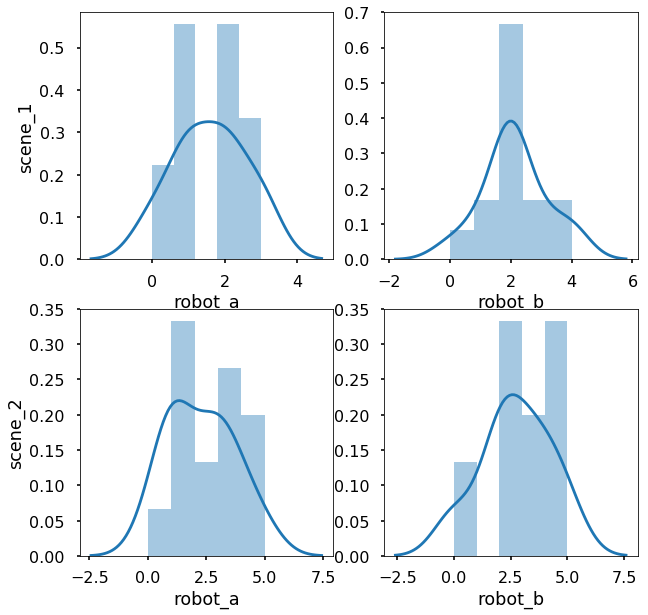

In [38]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

ax[0][0].set_ylabel("scene_1")
ax[1][0].set_ylabel("scene_2")
sns.distplot(odds_scene_1["robot_a"], bins=5, ax=ax[0][0])
sns.distplot(odds_scene_1["robot_b"], bins=5, ax=ax[0][1])
sns.distplot(odds_scene_2["robot_a"], bins=5, ax=ax[1][0])
sns.distplot(odds_scene_2["robot_b"], bins=5, ax=ax[1][1])

# Cubes when NVC is B (scene 3 and 4)

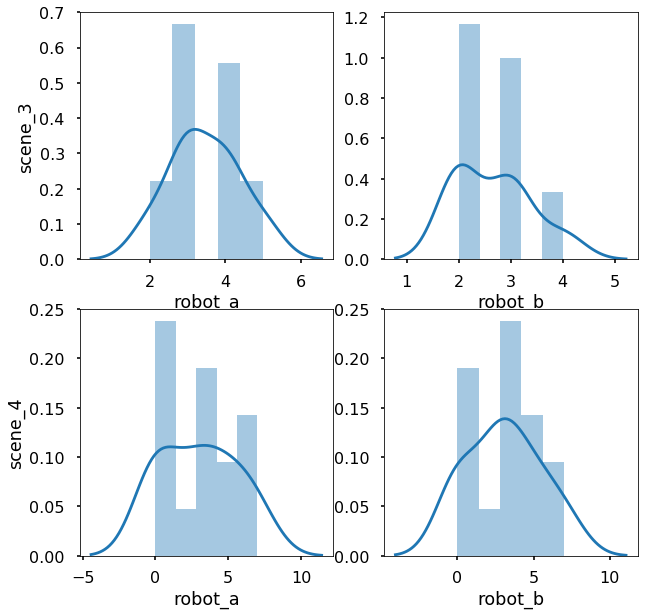

In [40]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

ax[0][0].set_ylabel("scene_3")
ax[1][0].set_ylabel("scene_4")
sns.distplot(odds_scene_3["robot_a"], bins=5, ax=ax[0][0])
sns.distplot(odds_scene_3["robot_b"], bins=5, ax=ax[0][1])
sns.distplot(odds_scene_4["robot_a"], bins=5, ax=ax[1][0])
sns.distplot(odds_scene_4["robot_b"], bins=5, ax=ax[1][1])

In [46]:
stats.normaltest(odds_scene_1["robot_a"])

/informatik2/students/home/8bhatia/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


NormaltestResult(statistic=0.5432696281746998, pvalue=0.7621325303403926)

In [47]:
stats.normaltest(odds_scene_1["robot_b"])

NormaltestResult(statistic=0.5170544514174786, pvalue=0.7721880073972129)

In [48]:
stats.normaltest(odds_scene_2["robot_a"])

NormaltestResult(statistic=0.8517040689297458, pvalue=0.6532129879796895)

In [50]:
stats.normaltest(odds_scene_2["robot_b"])

NormaltestResult(statistic=0.3182529247655048, pvalue=0.8528884938376817)

In [51]:
stats.normaltest(odds_scene_3["robot_a"])

NormaltestResult(statistic=0.1301759041791604, pvalue=0.936985049960191)

In [52]:
stats.normaltest(odds_scene_3["robot_b"])

NormaltestResult(statistic=1.5149671902062343, pvalue=0.468844747040303)

In [53]:
stats.normaltest(odds_scene_4["robot_a"])

NormaltestResult(statistic=2.890900610454966, pvalue=0.23563994276332603)

In [54]:
stats.normaltest(odds_scene_4["robot_b"])

NormaltestResult(statistic=0.7989033116892416, pvalue=0.6706877129098947)

# Wilcoxon Test

h0: there is no difference between a robot A and robot B <br>
h1: there is a difference

Scene 1

In [63]:
stats.wilcoxon(odds_scene_1["robot_a"], odds_scene_1["robot_b"])

WilcoxonResult(statistic=22.5, pvalue=0.1800720044990296)

Scene 2

In [64]:
stats.wilcoxon(odds_scene_2["robot_a"], odds_scene_2["robot_b"])

WilcoxonResult(statistic=42.5, pvalue=0.526675565758747)

Scene 3

In [65]:
stats.wilcoxon(odds_scene_3["robot_a"], odds_scene_3["robot_b"])

WilcoxonResult(statistic=9.0, pvalue=0.02577762176130498)

scene 4

In [66]:
stats.wilcoxon(odds_scene_4["robot_a"], odds_scene_4["robot_b"])

WilcoxonResult(statistic=39.0, pvalue=1.0)

# Conclusion

### For scene 1,2, and 4 p-value > 0.05, accept h0

### For scene 3 p-value < 0.05, reject h0

# Pair t-test

Scene 1

In [72]:
stats.ttest_rel(odds_scene_1["robot_a"], odds_scene_1["robot_b"])

Ttest_relResult(statistic=-1.3719886811400708, pvalue=0.19165258642711894)

Scene 2

In [73]:
stats.ttest_rel(odds_scene_2["robot_a"], odds_scene_2["robot_b"])

Ttest_relResult(statistic=-0.6704783996548059, pvalue=0.5134620490546827)

Scene 3

In [74]:
stats.ttest_rel(odds_scene_3["robot_a"], odds_scene_3["robot_b"])

Ttest_relResult(statistic=2.566755791678992, pvalue=0.022377804237141058)

Scene 4

In [75]:
stats.ttest_rel(odds_scene_4["robot_a"], odds_scene_4["robot_b"])

Ttest_relResult(statistic=-0.05278848552309164, pvalue=0.958646287302597)

### Conclusion
#### Scene 1, 2, 4 p-value >= 0.05, accept h0: There is no difference between a robot A and a robot B
#### Scene 3 p-value < 0.05, reject h0: There is a difference between a robot A and a robot B

# Separating data scene wise for participants where NVC is A

In [29]:
#evens_scene_0 = even_participants_data[(even_participants_data["scene"] == 0)]
evens_scene_1 = even_participants_data[(even_participants_data["scene"] == 1)]
evens_scene_2 = even_participants_data[(even_participants_data["scene"] == 2)]
evens_scene_3 = even_participants_data[(even_participants_data["scene"] == 3)]
evens_scene_4 = even_participants_data[(even_participants_data["scene"] == 4)]

# Cubes when NVC is A (scene 1 and 2)

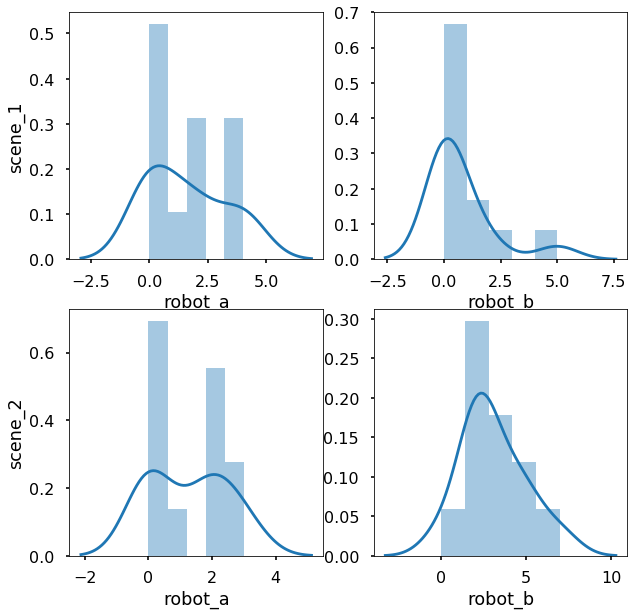

In [41]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

ax[0][0].set_ylabel("scene_1")
ax[1][0].set_ylabel("scene_2")
sns.distplot(evens_scene_1["robot_a"], bins=5, ax=ax[0][0])
sns.distplot(evens_scene_1["robot_b"], bins=5, ax=ax[0][1])
sns.distplot(evens_scene_2["robot_a"], bins=5, ax=ax[1][0])
sns.distplot(evens_scene_2["robot_b"], bins=5, ax=ax[1][1])

# Cubes when NVC is A (scene 3 and 4)

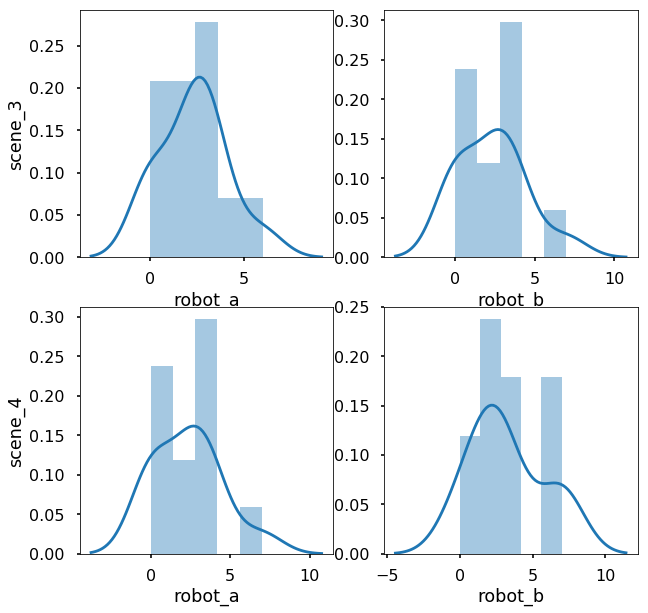

In [42]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

ax[0][0].set_ylabel("scene_3")
ax[1][0].set_ylabel("scene_4")
sns.distplot(evens_scene_3["robot_a"], bins=5, ax=ax[0][0])
sns.distplot(evens_scene_3["robot_b"], bins=5, ax=ax[0][1])
sns.distplot(evens_scene_4["robot_a"], bins=5, ax=ax[1][0])
sns.distplot(evens_scene_4["robot_b"], bins=5, ax=ax[1][1])

In [55]:
stats.normaltest(evens_scene_1["robot_a"])

/informatik2/students/home/8bhatia/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


NormaltestResult(statistic=2.6693097459869457, pvalue=0.2632490141239041)

In [56]:
stats.normaltest(evens_scene_1["robot_b"])

NormaltestResult(statistic=20.96714260016237, pvalue=2.799257392075663e-05)

In [57]:
stats.normaltest(evens_scene_2["robot_a"])

NormaltestResult(statistic=4.167259970610145, pvalue=0.12447753945890302)

In [58]:
stats.normaltest(evens_scene_2["robot_b"])

NormaltestResult(statistic=1.46384974703132, pvalue=0.4809822684353401)

In [59]:
stats.normaltest(evens_scene_3["robot_a"])

NormaltestResult(statistic=0.5664446850385741, pvalue=0.7533522669959474)

In [60]:
stats.normaltest(evens_scene_3["robot_b"])

NormaltestResult(statistic=1.545717777092897, pvalue=0.4616912559108344)

In [61]:
stats.normaltest(evens_scene_4["robot_a"])

NormaltestResult(statistic=1.545717777092897, pvalue=0.4616912559108344)

In [62]:
stats.normaltest(evens_scene_4["robot_b"])

NormaltestResult(statistic=1.2441632033675682, pvalue=0.5368258162135919)

# Wilcoxon Test when NVC A

h0: there is no difference between a robot A and robot B <br>
h1: there is a difference

Scene 1

In [67]:
stats.wilcoxon(evens_scene_1["robot_a"], evens_scene_1["robot_b"])

/informatik2/students/home/8bhatia/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:2388: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


WilcoxonResult(statistic=4.0, pvalue=0.17058693287144144)

Scene 2

In [69]:
stats.wilcoxon(evens_scene_2["robot_a"], evens_scene_2["robot_b"])

WilcoxonResult(statistic=0.0, pvalue=0.01714803250145893)

Scene 3

In [70]:
stats.wilcoxon(evens_scene_3["robot_a"], evens_scene_3["robot_b"])

WilcoxonResult(statistic=21.0, pvalue=0.8575886285730812)

Scene 4

In [71]:
stats.wilcoxon(evens_scene_4["robot_a"], evens_scene_4["robot_b"])

WilcoxonResult(statistic=13.0, pvalue=0.47784464138286953)

# Conclusion

### For scene 1,3, and 4 p-value > 0.05, accept h0

### For scene 2 p-value < 0.05, reject h0

# Pair t-test

Scene 1

In [76]:
stats.ttest_rel(evens_scene_1["robot_a"], evens_scene_1["robot_b"])

Ttest_relResult(statistic=1.4832396974191326, pvalue=0.16608681351829557)

Scene 2

In [77]:
stats.ttest_rel(evens_scene_2["robot_a"], evens_scene_2["robot_b"])

Ttest_relResult(statistic=-2.823129448013236, pvalue=0.016574623047769382)

Scene 3

In [78]:
stats.ttest_rel(evens_scene_3["robot_a"], evens_scene_3["robot_b"])

Ttest_relResult(statistic=0.0, pvalue=1.0)

Scene 4

In [79]:
stats.ttest_rel(evens_scene_4["robot_a"], evens_scene_4["robot_b"])

Ttest_relResult(statistic=-0.7251752196333576, pvalue=0.4834863062208209)

### Conclusion
#### Scene 1, 3, 4 p-value >= 0.05, accept h0: There is no difference between a robot A and a robot B
#### Scene 2 p-value < 0.05, reject h0: There is a difference between a robot A and a robot B